## 1. Markov Chain 
1. Definitions: The Markov chain is the process $X_0, X_1, X_2, ......$, the state of a Markov chain at time t is the value of $X_t$. 
2. Property: Only the most recent point in the trajectory afects what happens next: $P(X_{t+1} | X_t, X_{t-1},..., X_{0}) = P(X_{t+1} | X_t)$.

### Trasition matrix: 
It used to transit between different states, given as $P_{ij}$, entry (i,j) is the conditional probability of going from state i to state j: $P_{ij} = P(X_{t+1}=j|X_t=i)$.
##### Notes: 
1. The rows of P should each sum to 1: $\sum^N_{j=1}P_{ij} = 1$
2. Let ${X_0, X_1, X_2, ...}$ be a Markov chain with $N \times N$ transition matrix P. Then the n-step transition probabilites are given by the matrix $P^t$. That is $P(X_n=j|x_0=i) = (P^n)_{ij}$


### Example01: 
if we have the transition matrxi as:
$$
P = (\begin{matrix} 
0.6 & 0.2 & 0.2 \\
0.4 & 0 & 0.6 \\
0 & 0.8 & 0.2
\end{matrix})
$$
and we have the inital model $X_0 = (1, 0, 0)$

In [63]:
import numpy as np

In [64]:
P = np.matrix([[0.6, 0.2, 0.2],[0.4, 0, 0.6],[0, 0.8, 0.2]],dtype=float)
Xi = np.array([1,0,0])
N = 100
for i in range(N):
    Xi = Xi*P
    print("current round is {}, with state {}, Pn is {}".format(i+1, Xi, P**i))


current round is 1, with state [[0.6 0.2 0.2]], Pn is [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
current round is 2, with state [[0.44 0.28 0.28]], Pn is [[0.6 0.2 0.2]
 [0.4 0.  0.6]
 [0.  0.8 0.2]]
current round is 3, with state [[0.376 0.312 0.312]], Pn is [[0.44 0.28 0.28]
 [0.24 0.56 0.2 ]
 [0.32 0.16 0.52]]
current round is 4, with state [[0.3504 0.3248 0.3248]], Pn is [[0.376 0.312 0.312]
 [0.368 0.208 0.424]
 [0.256 0.48  0.264]]
current round is 5, with state [[0.34016 0.32992 0.32992]], Pn is [[0.3504 0.3248 0.3248]
 [0.304  0.4128 0.2832]
 [0.3456 0.2624 0.392 ]]
current round is 6, with state [[0.336064 0.331968 0.331968]], Pn is [[0.34016 0.32992 0.32992]
 [0.34752 0.28736 0.36512]
 [0.31232 0.38272 0.30496]]
current round is 7, with state [[0.3344256 0.3327872 0.3327872]], Pn is [[0.336064 0.331968 0.331968]
 [0.323456 0.3616   0.314944]
 [0.34048  0.306432 0.353088]]
current round is 8, with state [[0.33377024 0.33311488 0.33311488]], Pn is [[0.3344256 0.3327872 0.3327872]
 [0

We can see that when n reach a certain value, both state and transition matrix become stable.
### Stationary distribution
Over the long run, no matter what the starting state is, $\pi_n(x) = \pi_{n+1}(x) = ... = \pi(x)$. For each $\pi_i$, we have $\pi_i(x) = \pi_0(x)P^i$, so we can get: $\pi  = \pi P$.

Stationary conditon: For each i and j, if state transition matrix P and probability distribution $\pi (x)$ satisfy $\pi(i)P(i,j)=\pi(j)P(j,i)$, we said that $\pi(x)$ is the stationary distribution of P.

## 2. MCMC sampling
In fact, given a stationary distribution, it is still hard to find a P matrix that satifise the above equation. Assume we have a random transition matrix Q, we have: 
$$
\pi(i)Q(i,j) \neq \pi(j)Q(j,i),
$$  

To make it equal, we have introduce a $\alpha(i,j)$, then we have 
$$
\pi(i)Q(i,j)\alpha(i,j) \neq \pi(j)Q(j,i)\alpha(j,i)
$$, 
and 
$$
P(i,j) = Q(i,j)\alpha(i,j)
$$

That is, our target transition matrix can be obtained by a random matrix multiplied to a $\alpha(i,j)$, we call it as acceptance rate, ranging from 0 to 1.
#### MCMC algorithm:
1. Input a random Q and $\pi(x)$, set the number of state transition as $n_1$, the samples size is $n_2$;
2. set initial state $x_0$ from a random simple probability distribution;
3. for t = 0 to n1 + n2 -1: \
    a. sample $x^*$ from conditional distribution $Q(x^*|x_t)$; \
    b. draw u from uniform[0,1]; \
    c. if $u < \alpha(x_t,x^*) = \pi(x^*)Q(x^*|x_t)$, if accept: $x_{t+1}=x^*$, else: $x_{t+1}=x_t$.

The issue is that acceptance rate is too low.

## 3. Metrololis-Hasting (M-H) sampling
Modification: 
$$
\alpha(i,j) = \min ( \frac {\pi (j)Q(j,i)} {\pi(i)Q(i,j)}, 1)
$$
if Q is symmetrix, we can simplify it as 
$$
\alpha(i,j) = \min ( \frac {\pi (j)} {\pi(i)}, 1)
$$

### Example02:
Our target distribution is a Gaussian distribution with mean = 3, standard deviation = 2.

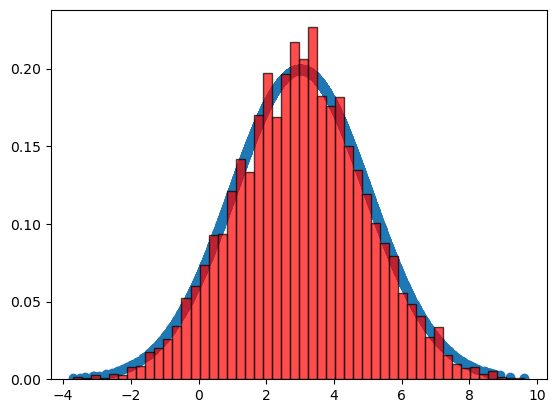

In [65]:
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

def norm_dist_prob(x):
    prob = norm.pdf(x, loc=3, scale=2)
    return prob

N = 5000
pi_list = []
pi = 0
for i in range(N):

    pi_new = norm.rvs(loc=pi, scale=1)
    alpha = min(1, (norm_dist_prob(pi_new) / norm_dist_prob(pi)))

    u = random.uniform(0, 1)
    if u < alpha:
        pi = pi_new
        pi_list.append(pi_new)

pi = np.array(pi_list)
plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=True, facecolor='red', edgecolor='black', alpha=0.7)
plt.show()

## 4. Gibbs sampling
Assuming $\pi (x_1, x_2)$ is a 2-D joint probability distribution, for two point with the first variable have the same value: $A(x_1^{(1)}, x_2^{(1)})$ and $B(x_1^{(1)}, x_2^{(2)})$, we can find:
$$
\pi (x_1^{(1)}, x_2^{(1)}) \pi(x_2^{(2)} | x_1^{(1)}) = \pi (x_1^{(1)}) \pi(x_2^{(1)} | x_1^{(1)}) \pi(x_2^{(2)} | x_1^{(1)}) \\
\pi (x_1^{(1)}, x_2^{(2)}) \pi(x_2^{(1)} | x_1^{(1)}) = \pi (x_1^{(1)}) \pi(x_2^{(2)} | x_1^{(1)}) \pi(x_2^{(1)} | x_1^{(1)})
$$
then we can get:
$$
\pi (x_1^{(1)}, x_2^{(1)}) \pi(x_2^{(2)} | x_1^{(1)}) = \pi (x_1^{(1)}, x_2^{(2)}) \pi(x_2^{(1)} | x_1^{(1)})
$$
that is 
$$
\pi (A) \pi(x_2^{(2)} | x_1^{(1)}) = \pi(B) \pi(x_2^{(1)} | x_1^{(1)})
$$

for the line $x_1 = x_1^{(1)}$, if we set conditional probability distribution $\pi (x_2|x_1^{(1)})$ as the state transition probability of Markov chain, then the transition of any two points in this line will satisfy the stationary condition. Samely, for the line of $x_2 = x_2^{(1)}$, we can set $\pi (x_1|x_2^{(1)})$ ...

Based on the above findings, we can set transition matrix P for $\pi(x_1,x_2)$ as:
$$
P(A \to B) = \pi(x_2^{(B)} | x_1^{(1)}), \quad if \quad x_1^{(A)} = x_1^{(B)} =x_1^{(1)} \\
P(A \to C) = \pi(x_1^{(C)} | x_2^{(1)}), \quad if \quad x_2^{(A)} = x_2^{(C)} =x_2^{(1)} \\
P(A \to B) = 0 \quad else \\
(means we should fix other variables when sampling a variable)
$$

We conclude that for any two points E and F in a 2-D space, when the condition below is satisfied:
$$
\pi(E) P(E \to F) = \pi(F) P(F \to E)
$$
the Markov chain will converge to a stationary distribution $\pi(x,y)$.

Compared to M-H sampling, Gibbs sampling is better when applying to high-dimensional problems.

#### N-Dimensional Gibbs algorithm:
1. Input $\pi(x_1, x_2, ..., x_n)$, set the number of state transition as $n_1$, the samples size is $n_2$;
2. set initial state $(x_1^0, x_2^0, ..., x_n^0)$ from a random simple probability distribution;
3. for t = 0 to n1 + n2 -1: \
    a. sample $x_1^{t+1}$ from conditional distribution $P(x_1|x_2^t,x_3^t,...,x_n^t)$; \
    b. sample $x_2^{t+1}$ from conditional distribution $P(x_2|x_1^{t+1},x_3^t,...,x_n^t)$; \
    c. ... \
    d. sample $x_n^{t+1}$ from conditional distribution $P(x_n|x_1^{t+1},x_2^{t+1},...,x_{n-1}^{t+1})$; \

### Example03:
Our target distribution is a 2-D Gaussian distribution $Norm (\mu, \Sigma)$ with:
$$
\mu = (\mu_1, \mu_2) = (5, -1) \\
\Sigma = (\begin{matrix} 
\sigma_1^2 & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2 
\end{matrix}) = (\begin{matrix} 
1 & 1 \\
1 & 4
\end{matrix})
$$

The state transition probability distribution is:
$$
P(x_1|x_2) = Norm(\mu_1+\rho\sigma_1/\sigma_2(x_2-\mu_2), (1-\rho^2)\sigma_1^2)
P(x_2|x_1) = Norm(\mu_2+\rho\sigma_2/\sigma_1(x_1-\mu_1), (1-\rho^2)\sigma_2^2)
$$

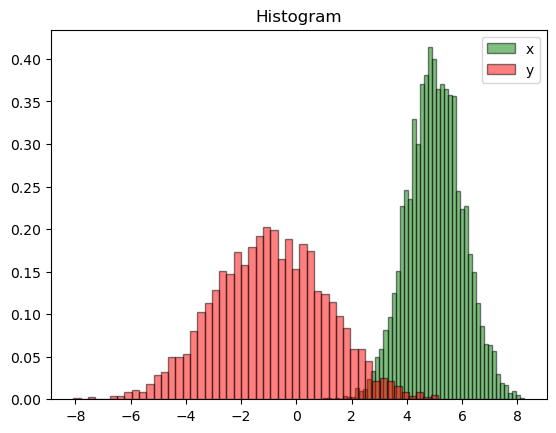

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean=[5,-1], cov=[[1,1],[1,4]]) 

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), np.sqrt((1 - rho ** 2) * (s2**2))))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), np.sqrt((1 - rho ** 2) * (s1**2))))

N = 5000
x_res, y_res, z_res = [], [], []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    x = p_xgiveny(y, m1, m2, s1, s2)
    y = p_ygivenx(x, m1, m2, s1, s2)
    z = rv.pdf([x,y])
    x_res.append(x)
    y_res.append(y)
    z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, density=True, facecolor='green',edgecolor='k', alpha=0.5, label='x')
plt.hist(y_res, num_bins, density=True, facecolor='red',edgecolor='k', alpha=0.5, label='y')
plt.legend()
plt.title('Histogram')
plt.show()

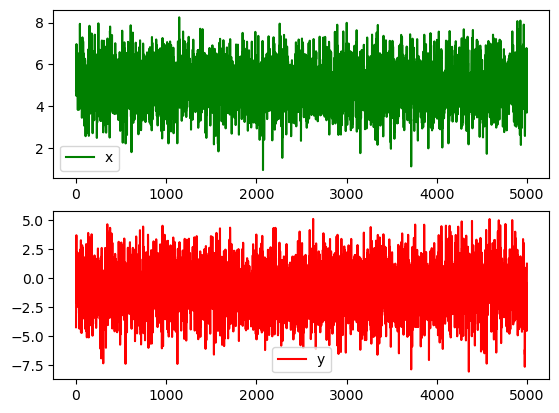

In [67]:
plt.figure(1)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
plt.sca(ax1)
plt.plot(x_res, 'g-', label="x")
plt.legend()
plt.sca(ax2)
plt.plot(y_res, 'r-', label="y")
plt.legend()
plt.show()

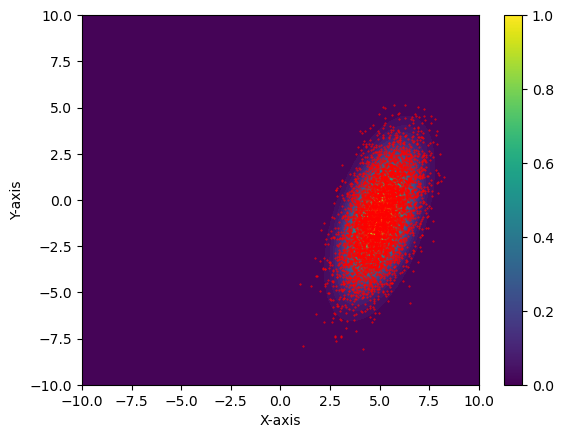

In [68]:
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
pos = np.dstack((x, y))
z = rv.pdf(pos)
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.scatter(x_res,y_res, c='r',s=0.2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()
plt.show()

Reference: https://www.cnblogs.com/pinard/p/6645766.html 